In [43]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
from fractions import Fraction

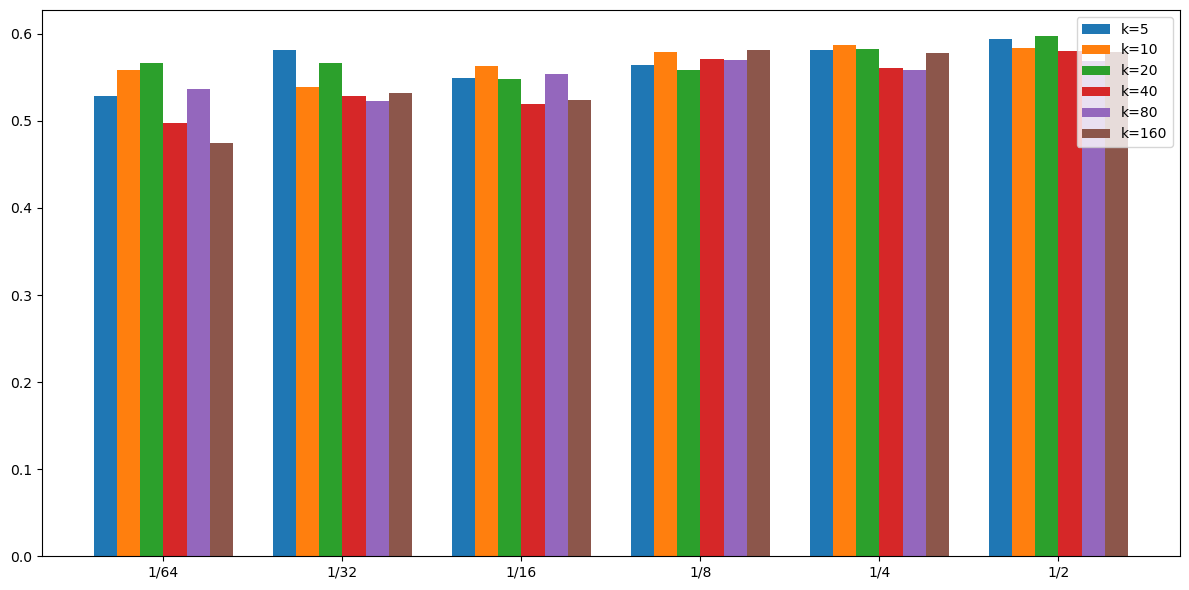

In [60]:
ssample_dir = Path(r'C:\Users\tibol\Desktop\FIIW Tibo Laperre\fase 5 - thesis\thesis-projectV2\data\results\ACSIncome_USA_2018_binned_imbalanced_16645\SSAMPLE')
classification_reports = []

df = pd.DataFrame()
for k_dir in ssample_dir.iterdir():
    k_val = int(k_dir.name[1:])
    for b_dir in k_dir.iterdir():
        b_val = float(b_dir.name[2:-1])
        with open(b_dir / 'ml' / 'classification_report.json', 'r') as json_file:
            report = json.load(json_file)
            flat_json = pd.json_normalize(report)
            flat_json['k'] = k_val
            flat_json['b'] = b_val
        df = pd.concat([df, flat_json], ignore_index=True)
            

metrics = ['precision', 'recall', 'f1-score']
avg_strats = ['macro avg', 'weighted avg']

b_values = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5]
fraction_b_values = [Fraction(value).limit_denominator() for value in b_values]
k_values = [5, 10, 20, 40, 80, 160]

my_dict = {}
for k in k_values:
    my_dict[k] = df.query(f'k == {k}')['macro avg.f1-score'].tolist()
    

x = np.arange(len(b_values))
width = 0.13
multiplier = 0

# fig,ax = plt.subplots()
plt.figure(figsize=(12,6))

for key, value in my_dict.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, value, width, label=f'k={key}')
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# ax.legend(loc='upper left', ncols=len(k_values))
plt.legend()
plt.xticks(ticks=x+float((multiplier-1)/2)*width, labels=fraction_b_values)
plt.tight_layout()
plt.show()
